In [1]:
import os
import glob
import numpy as np
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
# %matplotlib notebook
from matplotlib import patches, ticker
import matplotlib.pyplot as plt
from nilearn.image import get_data
import numpy as np
from nilearn.image import mean_img, index_img, resample_to_img, get_data
from nilearn import plotting
import time
from nilearn.regions import Parcellations
from nilearn import datasets
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the image
PATH_L = "/home/mwagner/projects/SynthSeg/data/labels_classes_priors/synthseg_parcellation_labels.npy"
PATH_N = "/home/mwagner/projects/SynthSeg/data/labels_classes_priors/synthseg_parcellation_names.npy"
label = np.load(PATH_L, mmap_mode='r')
name = np.load(PATH_N, mmap_mode='r')

In [3]:
# Read MRI parcellation SynthSeg output run with --parc flag
img_dir = "/cnl/abcd/data/imaging/smri/interim/synthseg/baseline/segmentations/sub-NDARINV0AAKGYA2_ses-baselineYear1Arm1_run-01_T1w_synthseg.nii"
# WITH CORTICAL PARCELLATION
img_nib = nib.load(img_dir)
nib_data = img_nib.get_fdata()

In [4]:
len(np.unique(nib_data))

99

In [5]:
# create colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

random.seed(50)
colors = [(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) 
          for i in range(int(np.max(nib_data)))]
cmap = ListedColormap(colors)
# create reference table

def colortable(colors, title, colors_sort = True, emptycols = 0):
  
    # cell dimensions
    width = 275
    height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40
  
    # Sorting colors based on hue, saturation,
    # value and name.
    if colors_sort is True:
        to_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
         
        names = [name for hsv, name in to_hsv]
         
    else:
        names = list(colors)
  
    length_of_names = len(names)
    length_cols = 4 - emptycols
    length_rows = length_of_names // length_cols + int(length_of_names % length_cols > 0)
  
    width2 = width * 4 + 2 * margin
    height2 = height * length_rows + margin + topmargin
    dpi = 72
  
    figure, axes = plt.subplots(figsize =(width2 / dpi, height2 / dpi), dpi = dpi)
    figure.subplots_adjust(margin / width2, margin / height2,
                        (width2-margin)/width2, (height2-topmargin)/height2)
     
    axes.set_xlim(0, width * 4)
    axes.set_ylim(height * (length_rows-0.5), -height / 2.)
    axes.yaxis.set_visible(False)
    axes.xaxis.set_visible(False)
    axes.set_axis_off()
    axes.set_title(title, fontsize = 24, loc ="left", pad = 10)
  
    for i, name in enumerate(names):
         
        rows = i % length_rows
        cols = i // length_rows
        y = rows * height
  
        swatch_start_x = width * cols
        swatch_end_x = width * cols + swatch_width
        text_pos_x = width * cols + swatch_width + 7
  
        axes.text(text_pos_x, y, name, fontsize = 14,
                horizontalalignment ='left',
                verticalalignment ='center')
  
        axes.hlines(y, swatch_start_x, swatch_end_x,
                  color = colors[name], linewidth = 18)
  
    return figure

# link the color with parcellation labels
info = dict(zip(list(label), list(name)))
part_dic = {}
for i in list(info.keys()):
    part_dic[info[i]] = colors[i-1]

In [9]:
# get all fMRI files

files=[]
path='/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/'

for filename in glob.iglob(path + '**/filt_cortex_fMRI_segmented_*.csv', recursive=True):
    files.append(filename)

In [10]:
# getting the time series data for the fMRI you want to plot

ts=np.asarray(pd.read_csv(files[0]))

In [11]:
np.shape(ts)

(374, 68)

In [23]:
left = [
"l-bsts",
"l-CACg",
"l-CMF",
"l-Cu",
"l-En",
"l-Fu",
"l-IP",
"l-IT",
"l-IstCg",
"l-LO",
"l-LOrF",
"l-Lg",
"l-MOrF",
"l-MT",
"l-PaH",
"l-PaC",
"l-Op",
"l-Or",
"l-Tr",
"l-PerCa",
"l-PoC",
"l-PoCg",
"l-PreC",
"l-PreCu",
"l-RoACg",
"l-RoMF",
"l-SF",
"l-SP",
"l-ST",
"l-SM",
"l-FPol",
"l-TPol",
"l-TrT",
"l-Ins",
]

right = ["r" + label[1:] for label in left]

# Concatenate the two lists
all_ROIs =left + right

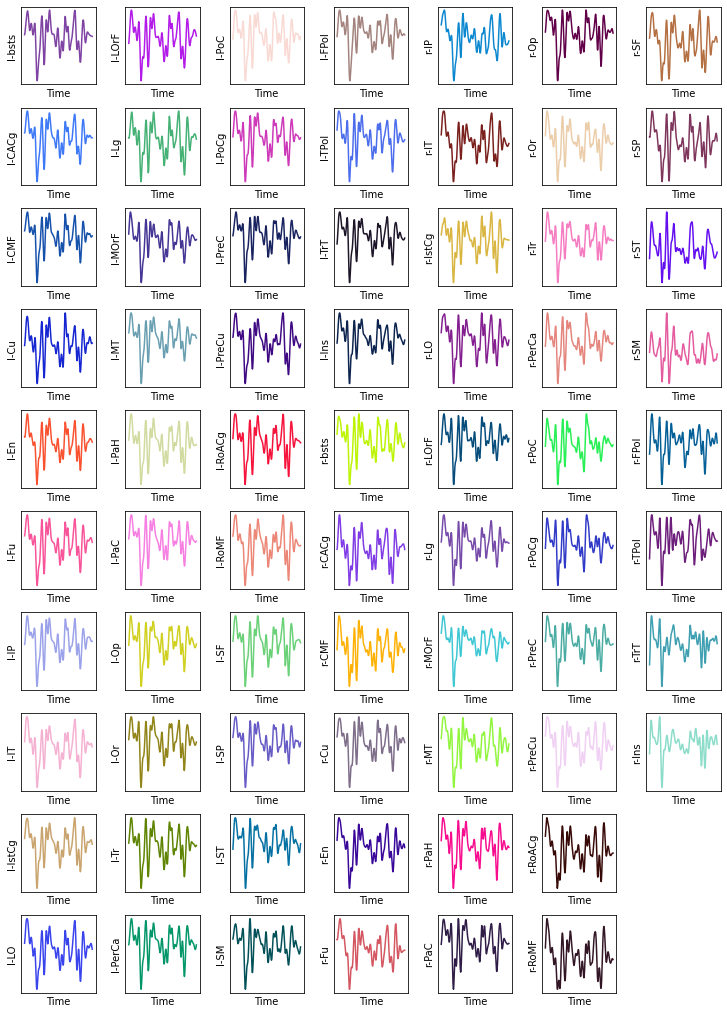

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
grid = plt.GridSpec(11, 11, wspace=0.4, hspace=0.3)

# Plot each time series
# for i, ax in enumerate(axes):
r=1
c=1
for i in range(ts.shape[1]):
    ax = plt.subplot(grid[r,c])
    ax.plot(ts[17:,i],c=colors[i])
#     ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(all_ROIs[i])
    ax.set_xlabel('Time')
    r=r+1
    if r==11:
        c=c+1
        r=1
        
plt.tight_layout()